In [1]:
import ROOT
import random as rand 

Welcome to JupyROOT 6.26/02


In [2]:
# A function that simulates a random step in one dimention. 0: do not move, 1, move one step
def randStep():
    u=rand.random()
    step=0
    if u>=0.5:
        step=1
    #
    return step

#a function that simulates a random walk consisted of n steps
def randWalk(nsteps):
    distance=sum([randStep() for i in range(nsteps)])
    return distance

In [3]:
Nsteps=1000
Nwalkers=100000
walks=[randWalk(Nsteps) for i in range(Nwalkers)]
    

In [4]:
def fill_hist(list_inp, hist_inp):
    '''
    this function takes a list as input
    and fils the given histogram with its elements
    '''
    for l in list_inp:
        hist_inp.Fill(l)
    #
    return
    

 FCN=63.9183 FROM MIGRAD    STATUS=CONVERGED      66 CALLS          67 TOTAL
                     EDM=2.57003e-12    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     5.03529e+03   1.97130e+01   6.27141e-02   1.22724e-07
   2  Mean         5.00603e+02   5.05782e-02   2.38706e-04   3.67689e-06
   3  Sigma        1.58354e+01   3.71114e-02   2.49599e-06   3.25051e-03


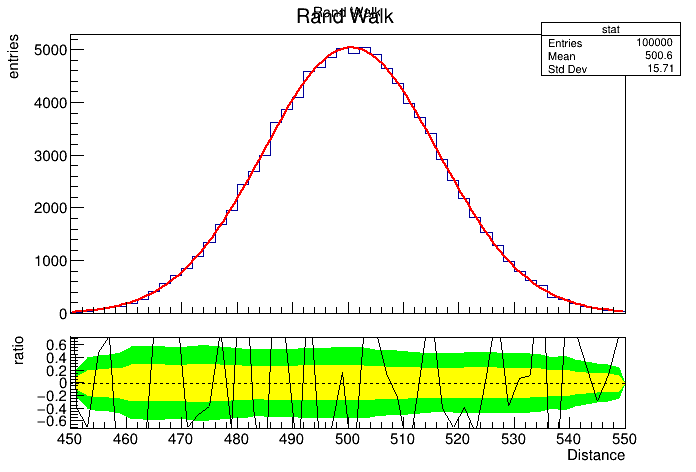

In [5]:
c=ROOT.TCanvas()
hist=ROOT.TH1F('stat','Rand Walk', 50, 450,550)
fill_hist(walks, hist)
hist.Fit("gaus")
hist.GetXaxis().SetTitle("Distance")
#hist.GetYaxis().SetTitle("counts")

rp1=ROOT.TRatioPlot(hist)
rp1.Draw()
rp1.GetLowerRefYaxis().SetTitle("ratio")
rp1.GetUpperRefYaxis().SetTitle("entries")
#hist.Draw()
c.Update()
c.Draw()

 FCN=63.9183 FROM MIGRAD    STATUS=CONVERGED      58 CALLS          59 TOTAL
                     EDM=2.58693e-12    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     5.03529e+03   1.97130e+01   6.27141e-02   1.23108e-07
   2  Mean         5.00603e+02   5.05782e-02   2.38706e-04   3.67609e-06
   3  Sigma        1.58354e+01   3.71115e-02   2.49599e-06   3.26170e-03


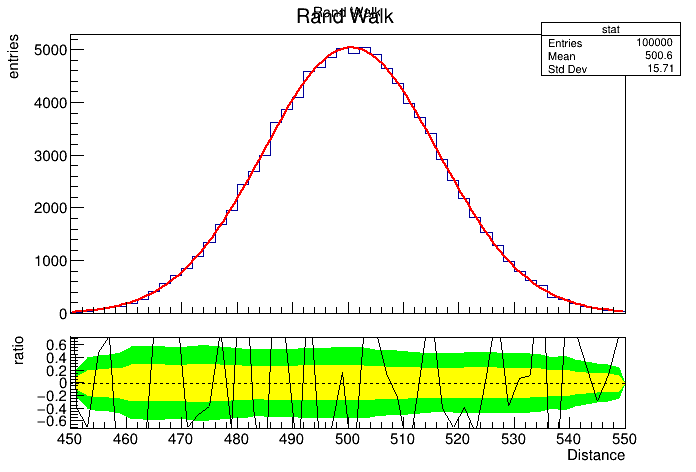

In [6]:
c1=ROOT.TCanvas()
c1.SetLogy(0)
hist_log=ROOT.TH1F('stats','Rand Walk', 50, 450,550)
fill_hist(walks, hist_log)
#
hist_log.Fit("gaus")
hist_log.GetXaxis().SetTitle("Distance")
#hist.GetYaxis().SetTitle("counts")

rp1=ROOT.TRatioPlot(hist)
rp1.Draw()
rp1.GetLowerRefYaxis().SetTitle("ratio")
rp1.GetUpperRefYaxis().SetTitle("entries")
#hist.Draw()
c1.Update()
c1.Draw()

In [7]:
# Lets try it using RDataframe
import numpy as np
walks_np=np.array(walks)
df=ROOT.RDF.MakeNumpyDataFrame({"walks_np":walks_np})

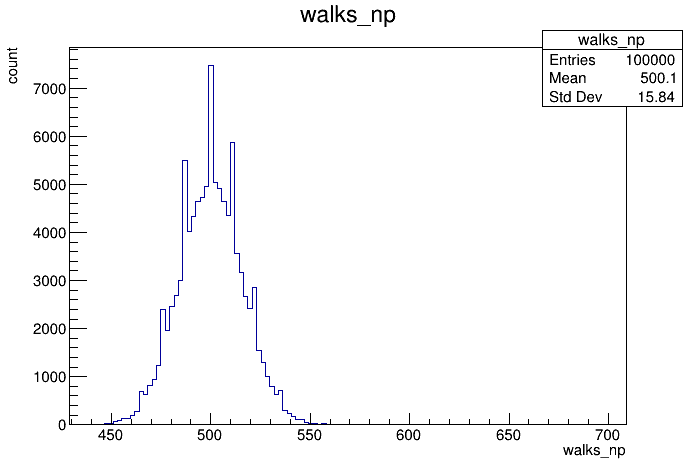

In [8]:
c3=ROOT.TCanvas()
h2=df.Histo1D("walks_np")
h2.Draw()
c3.Draw()

In [9]:
%%cpp
cout << "This is a C++ cell" << endl;

This is a C++ cell
